# Brick Kiln v1.0

### Done
* Convert images
* Georeferenced
* Write Task Specifications

### TODO
* partition
* decide if we should include images from zenodo as well

### Questions to authors
* why is the zenodo trainin set smaller than the evaluation set on github?
* why are there 2 samples that have a truncated and inconsistent shape e.g. sample TALL_043_2019 shapes are: rgb = (3,400,392), chm = (1,40,1), hyperspectral=(426,40,39)
* is spatial resolution 0.1m, 1m, 1m for rgb, chm, hs?

In [26]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..") # TODO fix this hack (can't set the project directory in notebook for vscode)
from ipywidgets import interact
import ipywidgets as widgets

from ccb.dataset import statistics
from dataset_converters import neon_tree
import ipyplot


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
dataset, samples, band_values, band_stats = statistics.load_and_veryify_samples(neon_tree.dataset_dir, n_samples=100)
statistics.check_integrity(samples, dataset.task_specs)

Extracting Statistics:   4%|▍         | 4/100 [00:00<00:02, 34.81it/s]

(400, 400)
(40, 40)
(400, 400)
(40, 40, 426)
(400, 400)
(400, 400)
(40, 40)
(400, 400)
(40, 40, 426)
(400, 400)
(400, 400)
(40, 40)
(400, 400)
(40, 40, 426)
(400, 400)
(400, 400)
(40, 40)
(400, 400)
(40, 40, 426)
(400, 400)
(400, 400)
(40, 40)
(400, 400)
(40, 40, 426)
(400, 400)
(400, 400)
(40, 40)
(400, 400)
(40, 40, 426)
(400, 400)
(400, 400)
(40, 40)
(400, 400)
(40, 40, 426)
(400, 400)
(400, 400)
(40, 40)
(400, 400)
(40, 40, 426)


Extracting Statistics:  12%|█▏        | 12/100 [00:00<00:02, 37.28it/s]

(400, 400)
(400, 400)
(40, 40)
(400, 400)
(40, 40, 426)
(400, 400)
(400, 400)
(40, 40)
(400, 400)
(40, 40, 426)
(400, 400)
(400, 400)
(40, 40)
(400, 400)
(40, 40, 426)
(400, 400)
(400, 400)
(40, 40)
(400, 400)
(40, 40, 426)
(400, 400)
(400, 400)
(40, 40)
(400, 400)
(40, 40, 426)
(400, 400)
(400, 400)
(40, 40)
(400, 400)
(40, 40, 426)
(400, 400)
(400, 400)
(40, 40)
(400, 400)
(40, 40, 426)
(400, 400)
(400, 400)
(40, 40)
(400, 400)
(40, 40, 426)


Extracting Statistics:  23%|██▎       | 23/100 [00:00<00:02, 37.51it/s]

(400, 400)
(400, 400)
(40, 40)
(400, 400)
(40, 40, 426)
(400, 400)
(400, 400)
(40, 40)
(400, 400)
(40, 40, 426)
(400, 400)
(400, 400)
(40, 40)
(400, 400)
(40, 40, 426)
(400, 400)
(400, 400)
(40, 40)
(400, 400)
(40, 40, 426)
(400, 400)
(400, 400)
(40, 40)
(400, 400)
(40, 40, 426)
(400, 400)
(400, 400)
(40, 40)
(400, 400)
(40, 40, 426)
(400, 400)
(400, 400)
(40, 40)
(400, 400)
(40, 40, 426)
(400, 400)
(400, 370)
(40, 3)


ValueError: Cannot take a larger sample than population when 'replace=False'

/Users/alexandre.lacoste/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)



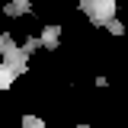
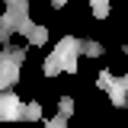
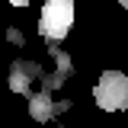
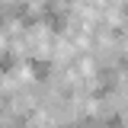
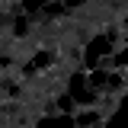
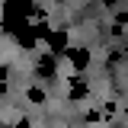
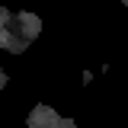
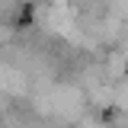
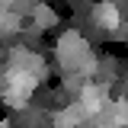
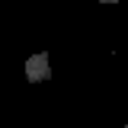
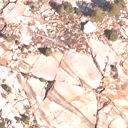
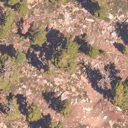
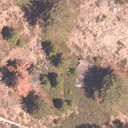
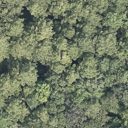
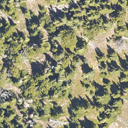
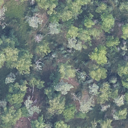
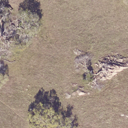
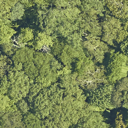
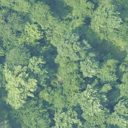
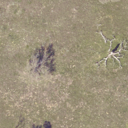


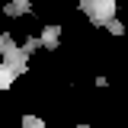
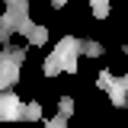
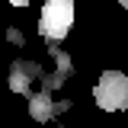
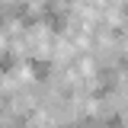
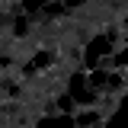
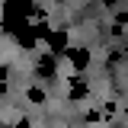
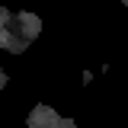
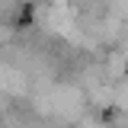
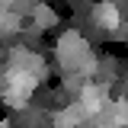
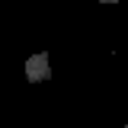
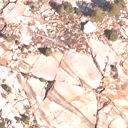
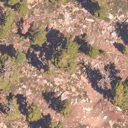
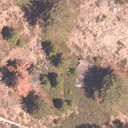
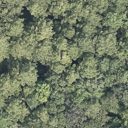
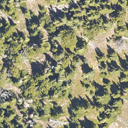
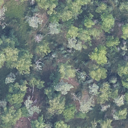
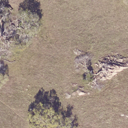
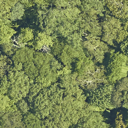
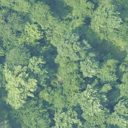
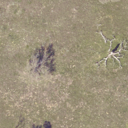

In [ ]:
images, labels = statistics.extract_bands(samples, (('red', 'green', 'blue'), ('CHM',)))
ipyplot.plot_class_tabs(images=images, labels=labels, img_width=128, max_imgs_per_tab=48)



In [ ]:
f = statistics.callback_hyperspectral_to_rgb(samples[:20], band_name="Neon", img_width=128)
interact(f, center=widgets.FloatSlider(min=0, max=426, step=1, value=10), width = widgets.FloatSlider(min=1, max=120, step=1, value=10));

interactive(children=(FloatSlider(value=10.0, description='center', max=426.0, step=1.0), FloatSlider(value=10…

In [ ]:
statistics.leaflet_map(samples)

100%|██████████| 10/10 [00:00<00:00, 103.59it/s]


Map(center=[37.102533584451166, -119.09162825275399], controls=(ZoomControl(options=['position', 'zoom_in_text…